In [2]:
# Data Analysis phase
#Aim is to understand more about the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
## Display all the columns of dataframe

pd.pandas.set_option('display.max_columns', None)
dataset = pd.read_csv('DATASET.csv')
## print shape of dataset with rows and columns
print(dataset.shape)

(801, 14)


In [22]:
dataset.head()

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,percentage_male,pokedex_number,type1,type2,weight_kg,generation
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",49,45,Seed PokÃÂ©mon,49,0.7,45,88.1,1,grass,poison,6.9,1
1,Ivysaur,"['Overgrow', 'Chlorophyll']",62,45,Seed PokÃÂ©mon,63,1.0,60,88.1,2,grass,poison,13.0,1
2,Venusaur,"['Overgrow', 'Chlorophyll']",100,45,Seed PokÃÂ©mon,123,2.0,80,88.1,3,grass,poison,100.0,1
3,Charmander,"['Blaze', 'Solar Power']",52,45,Lizard PokÃÂ©mon,43,0.6,39,88.1,4,fire,NaN,8.5,1
4,Charmeleon,"['Blaze', 'Solar Power']",64,45,Flame PokÃÂ©mon,58,1.1,58,88.1,5,fire,NaN,19.0,1


## Missing Values

In [23]:
# columns with nan values in it 
features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>= 1]
#print those columns with percentage of missing values
for feature in features_with_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4)*100, '% missing values')

height_m 2.5 % missing values
percentage_male 12.23 % missing values
type2 47.94 % missing values
weight_kg 2.5 % missing values


In [24]:
# as from above output type2 columns has more than 30% missing values so, we need to drop that column
dataset.drop(["type2"],axis =1,inplace = True)

In [26]:
dataset.head()

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,percentage_male,pokedex_number,type1,weight_kg,generation
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",49,45,Seed PokÃÂ©mon,49,0.7,45,88.1,1,grass,6.9,1
1,Ivysaur,"['Overgrow', 'Chlorophyll']",62,45,Seed PokÃÂ©mon,63,1.0,60,88.1,2,grass,13.0,1
2,Venusaur,"['Overgrow', 'Chlorophyll']",100,45,Seed PokÃÂ©mon,123,2.0,80,88.1,3,grass,100.0,1
3,Charmander,"['Blaze', 'Solar Power']",52,45,Lizard PokÃÂ©mon,43,0.6,39,88.1,4,fire,8.5,1
4,Charmeleon,"['Blaze', 'Solar Power']",64,45,Flame PokÃÂ©mon,58,1.1,58,88.1,5,fire,19.0,1


In [27]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print('Number of numerical variables', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables 8


,attack,defense,height_m,hp,percentage_male,pokedex_number,weight_kg,generation
0,49,49,0.7,45,88.1,1,6.9,1
1,62,63,1.0,60,88.1,2,13.0,1
2,100,123,2.0,80,88.1,3,100.0,1
3,52,43,0.6,39,88.1,4,8.5,1
4,64,58,1.1,58,88.1,5,19.0,1


<AxesSubplot:>

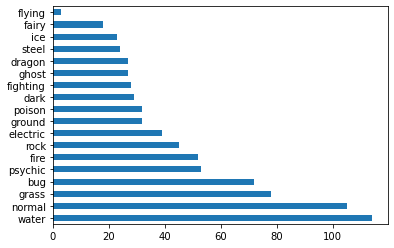

In [37]:
dataset['type1'].value_counts().plot(kind='barh')

In [56]:
dataset.sort_values('attack',ascending = False)[['name','attack']].head(5)

,name,attack
213,Heracross,185
797,Kartana,181
382,Groudon,180
383,Rayquaza,180
444,Garchomp,170


In [57]:
dataset.sort_values('defense',ascending = False)[['name','defense']].head(5)

,name,defense
305,Aggron,230
212,Shuckle,230
207,Steelix,230
376,Regirock,200
712,Avalugg,184


In [58]:
dataset.sort_values('hp',ascending = False)[['name','hp']].head(5)

,name,hp
241,Blissey,255
112,Chansey,250
798,Guzzlord,223
717,Zygarde,216
201,Wobbuffet,190


In [132]:
dataset.sort_values('capture_rate',ascending = False)[['name','capture_rate']].head(5)

,name,capture_rate
744,Lycanroc,90
21,Fearow,90
766,Wimpod,90
194,Quagsire,90
27,Sandslash,90


In [60]:
dataset.sort_values('weight_kg',ascending = False)[['name','weight_kg']].head(5)

,name,weight_kg
789,Cosmoem,999.9
796,Celesteela,999.9
382,Groudon,950.0
749,Mudsdale,920.0
798,Guzzlord,888.0


In [ ]:
dataset.sort_values('height_m',ascending = False)[['name','height_m']].head(5)

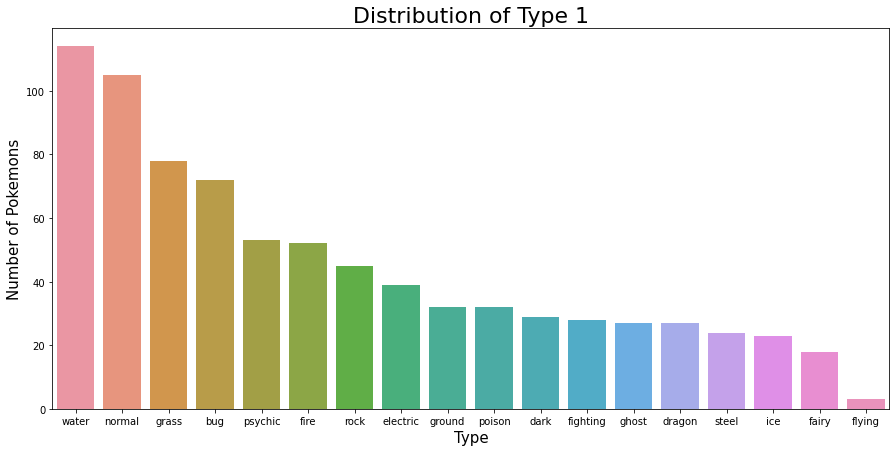

In [46]:
plt.figure(figsize=(15,7))
b = sns.countplot(x = dataset['type1'], order = dataset['type1'].value_counts().index)
b.axes.set_title("Distribution of Type 1",fontsize=22)
b.set_xlabel("Type",fontsize=15)
b.set_ylabel("Number of Pokemons",fontsize=15)
plt.show()

In [68]:
dataset['percentage_male'].unique()

array([ 88.1,  50. ,   0. , 100. ,  24.6,  75.4,   nan,  11.2])

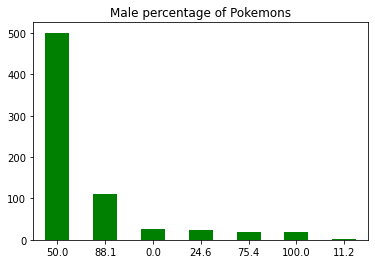

<Figure size 1080x504 with 0 Axes>

In [83]:
data = dataset['percentage_male'].value_counts()
ax = data.plot(kind='bar', rot = 0, color= "g")
ax.set_title("Male percentage of Pokemons")
plt.figure(figsize=(15,7))
plt.show()

In [77]:
count = 0
for feature in dataset['percentage_male']:
    if feature == 0:
        count+=1
        

In [78]:
print('Number of only female pokemons:{}'.format(count))

Number of only female pokemons:27


In [84]:
dataset['abilities'].unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
       "['Keen Eye', 'Sniper']", "['Intimidate', 'Shed Skin', 'Unnerve']",
       "['Static', 'Lightningrod']",
       "['Static', 'Lightningrod', 'Surge Surfer']",
       "['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slush Rush']",
       "['Poison Point', 'Rivalry', 'Hustle']",
       "['Poison Point', 'Rivalry', 'Sheer Force']",
       "['Cute Charm', 'Magic Guard', 'Friend Guard']",
       "['Cute Charm', 'Magic Guard', 'Unaware']",
       "['Flash Fire', 'Drought', 'Snow Cloak', 'Snow Warning']",
       "['Cute Charm', 'Competitive', 'Friend Guard']",
       "['Cute Charm', 'Competitive', 'Frisk']",
       "['Inner Focus', 'Infiltrator']", "['Chlor

In [101]:
# converting list of values in abilities column to single values  
dataset['abilities'] = dataset['abilities'].apply(eval)

In [102]:
# function to the dimension of abilities from 2D to 1D
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [107]:
to_1D(dataset['abilities']).value_counts()

Sturdy            41
Swift Swim        38
Keen Eye          37
Chlorophyll       35
Levitate          33
                  ..
Electric Surge     1
Flower Gift        1
Triage             1
Battery            1
Aura Break         1
Length: 227, dtype: int64

In [125]:
# getting the top 10 most popular abilitities pokemons 
df = pd.DataFrame(to_1D(dataset['abilities']).value_counts())
df_ = df.head(10)

In [126]:
df_

,0
Sturdy,41
Swift Swim,38
Keen Eye,37
Chlorophyll,35
Levitate,33
Inner Focus,32
Intimidate,31
Swarm,25
Sheer Force,25
Pressure,25


<AxesSubplot:>

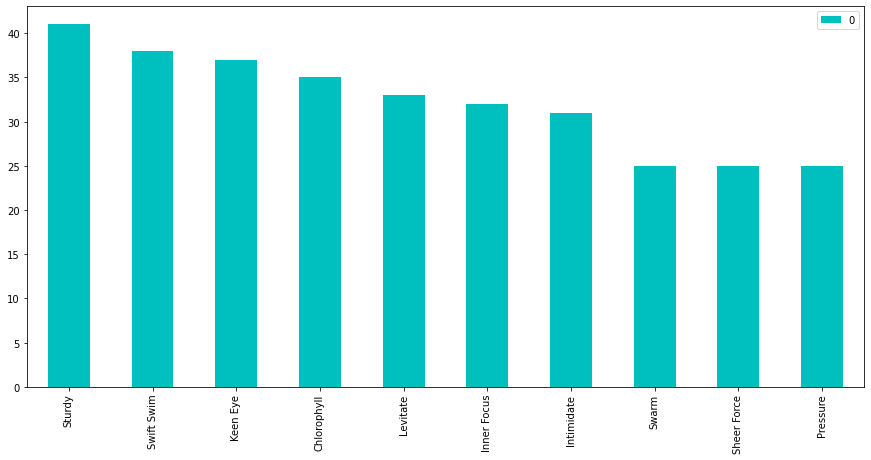

In [131]:
# bar plot to show number of Pokemons with the top 10 abilities
df_.plot(kind='bar',color = 'c',figsize = (15,7))